In [995]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import missingno as msno

In [996]:
# loading the dataset to a Pandas DataFrame
air_quality_data = pd.read_csv('AirQuality.csv')

-------------------------------First observations------------------------------------

In [998]:
# number of rows & columns in the dataset
air_quality_data.shape

(9471, 1)

In [999]:
# printing the first 5 rows of the dataset
air_quality_data.head()

Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             7;0  7255;;                                                NaN                                                                          
10/03/2004;20.00.00;2            2;1402;88;9                   0;939;131;1140;114;1555;1074;11  9;54 0;0                                                7502;;                                                                          
10/03/2004;21.00.00;2            2;1376;80;9                   2;948;172;1092;122;1584;1203;11  0;60 0;0                                                7867;;                                                                          
10/03/2004;22.00.00;1            6;1272;51;6                   5;836;131;1205;116;1490;1110;11  2;59 6;0                                                7888;;

-------------------------------Data Cleaning------------------------------------

Step 1 - All the values in the css file are separated by ‘;’ and Few columns have commas in the place of the decimal points

In [1002]:
# specifying the semicolon as the delimiter
air_quality_data = pd.read_csv('AirQuality.csv', sep=';', decimal=',')

# first 5 rows of the dataset
air_quality_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

Step 2 - Removing the last 2 columns from the dataframe

In [1004]:
#removing the last 2 columns from the dataframe
air_quality_data = air_quality_data.iloc[:, :-2]

# printing the first 5 rows of the dataset
air_quality_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

Step 3 - Removing the last rows from the dataframe which has null values

In [1006]:
# printing the last 5 rows of the dataset
air_quality_data.tail()

Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9466  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9467  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9468  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9469  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9470  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  
9466      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9467      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9468      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9469      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9470      NaN           NaN      NaN           NaN          NaN NaN NaN NaN

In [1007]:
# number of rows & columns in the dataset
air_quality_data.shape

(9471, 15)

9356 represents the last data point in the data frame and remaining rows are just null values
Index = 9356, Since python numbering starts from 0, Row = 9357th row
Take the first 9357 rows from the data frame.

In [1009]:
# select the row at index 9356.
air_quality_data.loc[[9356]]

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9356        816.0  28.5  13.1  0.5028

In [1010]:
# Removes any rows beyond the 9356th index (the last valid data point).
air_quality_data = air_quality_data.head(9357)

# printing the first 5 rows of the dataset
air_quality_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [1011]:
# printing the first 5 rows of the dataset
air_quality_data.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

In [1012]:
# number of rows & columns in the dataset
air_quality_data.shape

(9357, 15)

Step 4 - Gathering information about the data

In [1014]:
#getting info about the data
air_quality_data.info()#getting info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


Step 5 - Checking the number of missing values and replacing with mean

In [1016]:
#checking the number of missing values in the data frame
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

This shows that there are no missing values in the dataset. But the actual missing values are tagged with the value “-200”.
This is described in dataset documentation.

In [1018]:
# Check how many times the value -200 appears in the DataFrame
# and sum the occurrences for each column.
air_quality_data.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Create a bar plot to visually represent the percentage of missing values for each column.

In [1020]:
# Check how many times the value -200 appears in the DataFrame
missing_values_count = air_quality_data.isin([-200]).sum(axis=0)

# Calculate the percentage of missing values for each column
missing_values_percentage = (missing_values_count / len(air_quality_data)) * 100

# Create a DataFrame for better plotting with seaborn
missing_data = pd.DataFrame({
    'Column': missing_values_percentage.index,
    'Percentage': missing_values_percentage.values
})

# Create a bar plot for missing values percentage using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.barplot(data=missing_data, x='Column', y='Percentage', color='lightcoral')
plt.title('Missing Values Percentage by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.ylim(0, 100)  # Set y-axis limit for better visibility
plt.tight_layout()  # Adjust spacing between plots
plt.show()  # Show the plot

Handling missing values

Convert all - 200 to NaN
Replace all NaN values with mean of that specific column

In [1022]:
air_quality_data = air_quality_data.replace(to_replace=-200, value = np.NaN)

In [1023]:
#checking the number of missing values in the data frame
air_quality_data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

This shows the actual number of missing values

In [1025]:
# printing the last 5 rows of the dataset
air_quality_data.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0       NaN      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0       NaN      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0       NaN      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0       NaN       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0       NaN      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

Find the Mean of each column

In [1027]:
mean_values = air_quality_data.select_dtypes(include='number').mean()
print(mean_values)

CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64


In [1028]:
# Replacing missing values with the mean value for numeric columns only
numeric_columns = air_quality_data.select_dtypes(include='number')
air_quality_data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

# printing the last 5 rows of the dataset
air_quality_data.tail()

Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0  218.811816      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0  218.811816      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0  218.811816      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0  218.811816       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0  218.811816      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

In [1029]:
#checking the number of missing values in the data frame
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Removing Outliers

In [1031]:
# Use bar plots for non-numeric columns like 'Date' and 'Time',
# and apply box plots and histograms for numeric data.

In [1032]:
def generate_boxplot(data, column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column_name])
    # Customize the y-axis tick labels
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.ylabel(column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()

In [1033]:
def generate_histogram(data, column_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column_name], bins=20, kde=True)
    # Customize the y-axis tick labels
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.show()

In [1034]:
# Define a function to generate a bar chart for a specific column
def generate_bar_chart(data, column_name):
    # For date columns, convert to datetime if not already
    if column_name == 'Date':
        data[column_name] = pd.to_datetime(data[column_name], format='%d/%m/%Y')

        # Group by month and count occurrences
        data_counts = data[column_name].dt.to_period('M').value_counts().sort_index()
    else:
        data_counts = data[column_name].value_counts().sort_index()

    # Create a bar plot using Seaborn
    plt.figure(figsize=(8, 4))  # Adjust the figure size for an even smaller graph
    sns.barplot(x=data_counts.index.astype(str), y=data_counts.values)  # Convert index to string for better x-axis labels

    # Customize the plot
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.ylim(0, data_counts.max() * 1.1)  # Set y-axis limits for better visibility
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation
    plt.show()

    return data_counts  # Return the counts for further analysis

1. Column Date

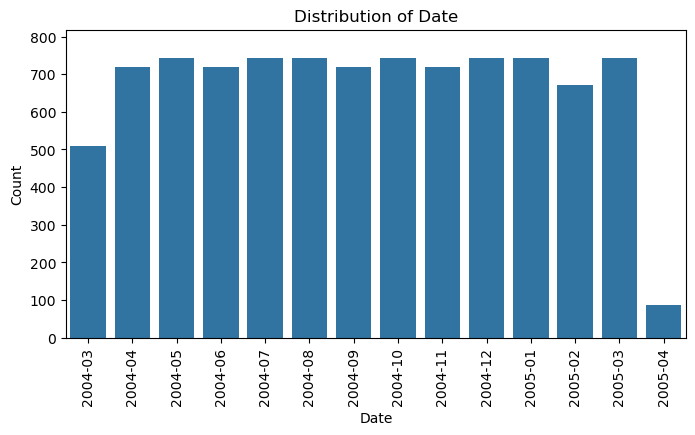

Data Counts by Month:
Date
2004-03    510
2004-04    720
2004-05    744
2004-06    720
2004-07    744
2004-08    744
2004-09    720
2004-10    744
2004-11    720
2004-12    744
2005-01    744
2005-02    672
2005-03    744
2005-04     87
Freq: M, Name: count, dtype: int64


In [1036]:
# Generate the bar chart and get data_counts
data_counts = generate_bar_chart(air_quality_data, 'Date')

# Display the data counts
print("Data Counts by Month:")
print(data_counts)

In [1037]:
# Calculate IQR
Q1 = np.percentile(data_counts.values, 25)  # First quartile
Q3 = np.percentile(data_counts.values, 75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_counts[data_counts < lower_bound].index.tolist() + data_counts[data_counts > upper_bound].index.tolist()

print("Outliers detected:", outliers)

Outliers detected: [Period('2004-03', 'M'), Period('2005-02', 'M'), Period('2005-04', 'M')]


In [1038]:
# Remove the outlier for April 2005
air_quality_data = air_quality_data[~(air_quality_data['Date'].dt.to_period('M') == '2005-04')]

In [1039]:
# Regenerate the bar chart to see the updated distribution
updated_data_counts = generate_bar_chart(air_quality_data, 'Date')
print("Updated Data Counts by Month:")
print(updated_data_counts)

Updated Data Counts by Month:
Date
2004-03    510
2004-04    720
2004-05    744
2004-06    720
2004-07    744
2004-08    744
2004-09    720
2004-10    744
2004-11    720
2004-12    744
2005-01    744
2005-02    672
2005-03    744
Freq: M, Name: count, dtype: int64


2. Column Time

In [1041]:
# Step 1: Convert Time column to string and replace dots with colons
air_quality_data['Time'] = air_quality_data['Time'].astype(str).str.replace('.', ':')  # Replace '.' with ':'
air_quality_data['Time'] = pd.to_datetime(air_quality_data['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Step 2: Convert time to seconds
air_quality_data['Time_in_seconds'] = air_quality_data['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Step 3: Inspect unique time values
print("Unique Time Values:")
print(air_quality_data['Time'].unique())

# Step 4: Check converted time values
min_time = air_quality_data['Time_in_seconds'].min()
max_time = air_quality_data['Time_in_seconds'].max()
print("Min Time in seconds:", min_time)
print("Max Time in seconds:", max_time)

# Step 5: Adjust outlier detection method
mean = air_quality_data['Time_in_seconds'].mean()
std_dev = air_quality_data['Time_in_seconds'].std()

# Set outlier thresholds (e.g., 2 standard deviations from the mean)
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

# Identify outliers
outliers = air_quality_data[(air_quality_data['Time_in_seconds'] < lower_bound) | (air_quality_data['Time_in_seconds'] > upper_bound)]

# Step 6: Display results
if not outliers.empty:
    print("Outliers detected in Time after adjusting thresholds:")
    print(outliers)
else:
    print("No outliers detected in Time.")

Unique Time Values:
[datetime.time(18, 0) datetime.time(19, 0) datetime.time(20, 0)
 datetime.time(21, 0) datetime.time(22, 0) datetime.time(23, 0)
 datetime.time(0, 0) datetime.time(1, 0) datetime.time(2, 0)
 datetime.time(3, 0) datetime.time(4, 0) datetime.time(5, 0)
 datetime.time(6, 0) datetime.time(7, 0) datetime.time(8, 0)
 datetime.time(9, 0) datetime.time(10, 0) datetime.time(11, 0)
 datetime.time(12, 0) datetime.time(13, 0) datetime.time(14, 0)
 datetime.time(15, 0) datetime.time(16, 0) datetime.time(17, 0)]
Min Time in seconds: 0
Max Time in seconds: 82800
No outliers detected in Time.


In [1042]:
# The Function to Generate Plots
def generate_plots(data, column_name):
    # Calculate quartiles and IQR
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate non-outlier min/max
    non_outlier_max = data[data[column_name] <= upper_bound][column_name].max()
    non_outlier_min = data[data[column_name] >= lower_bound][column_name].min()

    # Print calculated values
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower bound for outliers: {lower_bound}")
    print(f"Upper bound for outliers: {upper_bound}")
    print(f"Minimum value that is not an outlier: {non_outlier_min}")
    # print(f"Maximum value that is not an outlier: {non_outlier_max}")

    # Plotting
    plt.figure(figsize=(8, 4))  # Adjust the figure size for a smaller graph

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[column_name])
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.ylabel(column_name)
    plt.title(f'Box Plot of {column_name}')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name], bins=20, kde=True)
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')

    plt.tight_layout()
    plt.show()

In [1043]:
air_quality_data_copy = air_quality_data

In [1044]:
air_quality_data = air_quality_data_copy

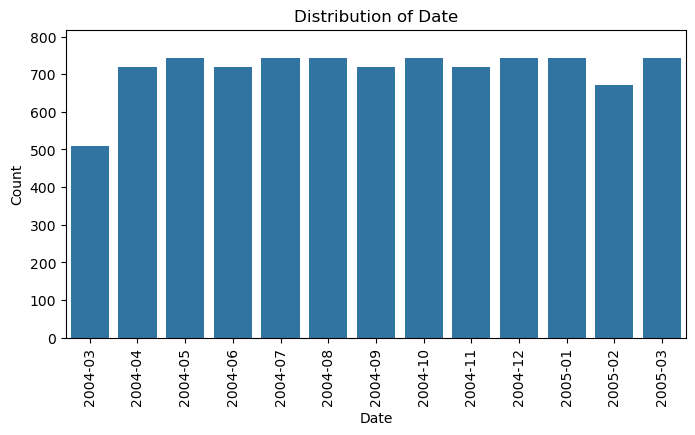

Updated Data Counts by Month:
Date
2004-03    510
2004-04    720
2004-05    744
2004-06    720
2004-07    744
2004-08    744
2004-09    720
2004-10    744
2004-11    720
2004-12    744
2005-01    744
2005-02    672
2005-03    744
Freq: M, Name: count, dtype: int64


In [1045]:
# Regenerate the bar chart to see the updated distribution
updated_data_counts = generate_bar_chart(air_quality_data, 'Date')
print("Updated Data Counts by Month:")
print(updated_data_counts)

3. Column: CO(GT)

Q1 (25th percentile): 1.3
Q3 (75th percentile): 2.6
IQR: 1.3
Lower bound for outliers: -0.6500000000000001
Upper bound for outliers: 4.550000000000001
Minimum value that is not an outlier: 0.1


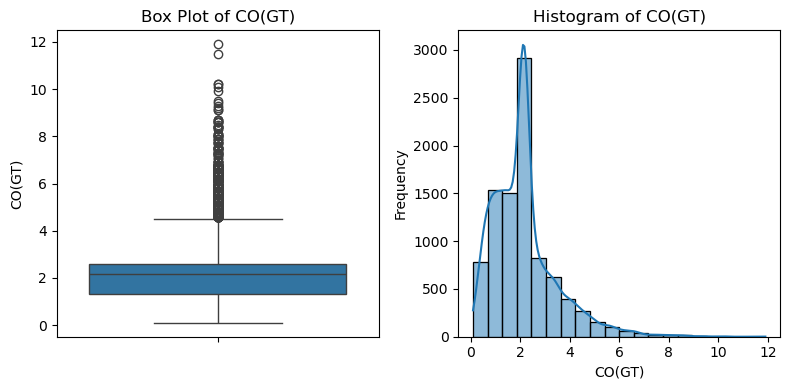

Dataset shape after removing outliers: (8242, 16)
Q1 (25th percentile): 1.1
Q3 (75th percentile): 2.2
IQR: 1.1
Lower bound for outliers: -0.55
Upper bound for outliers: 3.8500000000000005
Minimum value that is not an outlier: 0.1


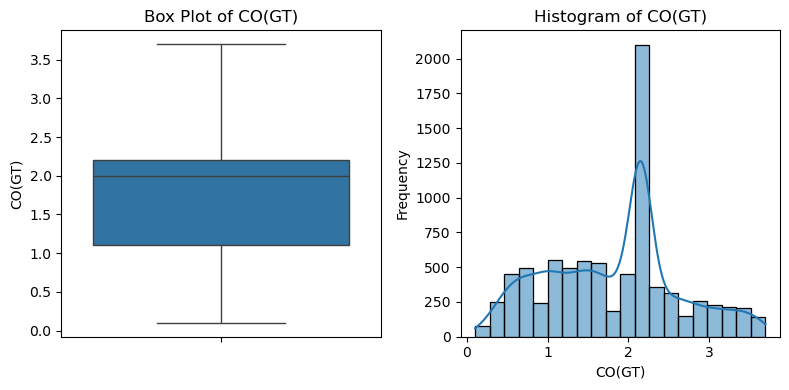

In [1047]:
# Generate plots for 'CO(GT)' before removing outliers
generate_plots(air_quality_data, 'CO(GT)')

# Filter the dataset to remove outliers
air_quality_data = air_quality_data[(air_quality_data['CO(GT)'] <= 3.7)]

# Generate plots for 'CO(GT)' after removing outliers
print("Dataset shape after removing outliers:", air_quality_data.shape)
generate_plots(air_quality_data, 'CO(GT)')

4. Column: PT08.S1(CO)

Q1 (25th percentile): 929.0
Q3 (75th percentile): 1163.0
IQR: 234.0
Lower bound for outliers: 578.0
Upper bound for outliers: 1514.0
Minimum value that is not an outlier: 647.0


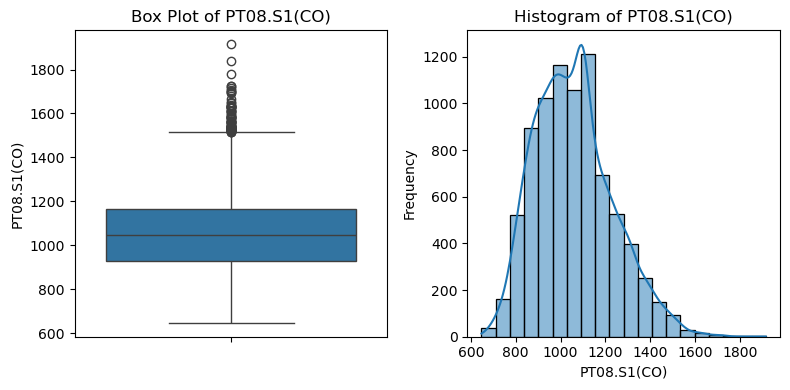

Q1 (25th percentile): 927.0
Q3 (75th percentile): 1158.0
IQR: 231.0
Lower bound for outliers: 580.5
Upper bound for outliers: 1504.5
Minimum value that is not an outlier: 689.0


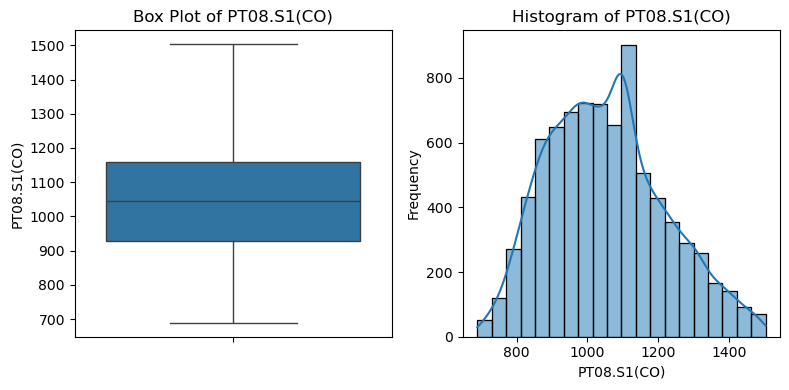

In [1049]:
# Generate plots for 'PT08.S1(CO)' before removing outliers
generate_plots(air_quality_data, 'PT08.S1(CO)')

# Filter the dataset to remove outliers
air_quality_data = air_quality_data[(air_quality_data['PT08.S1(CO)'] >= 689.0) & (air_quality_data['PT08.S1(CO)'] <= 1503.0)]

# Generate plots for 'PT08.S1(CO)' after removing outliers
generate_plots(air_quality_data, 'PT08.S1(CO)')

5. Column: NMHC(GT)

Q1 (25th percentile): 218.81181619256017
Q3 (75th percentile): 218.81181619256017
IQR: 0.0
Lower bound for outliers: 218.81181619256017
Upper bound for outliers: 218.81181619256017
Minimum value that is not an outlier: 218.81181619256017


Q1 (25th percentile): 50.0
Q3 (75th percentile): 140.25
IQR: 90.25
Lower bound for outliers: -85.375
Upper bound for outliers: 275.625
Minimum value that is not an outlier: 7.0


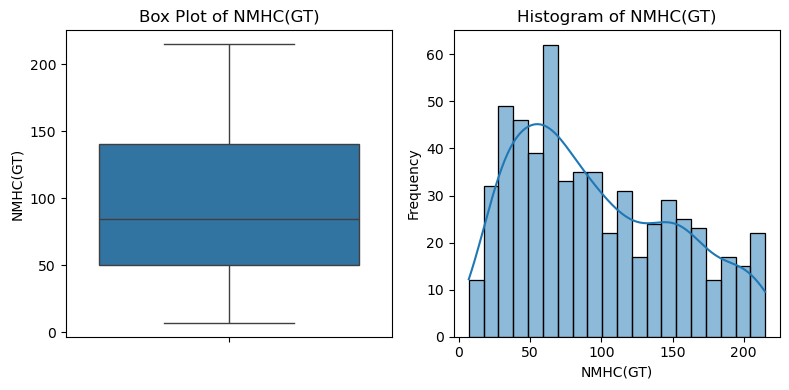

In [1051]:
# Generate plots for 'NMHC(GT)' before removing outliers
generate_plots(air_quality_data, 'NMHC(GT)')

# Filter the dataset to remove outliers based on specified bounds
air_quality_data = air_quality_data[(air_quality_data['NMHC(GT)'] <= 215)]

# Generate plots for 'NMHC(GT)' after removing outliers
generate_plots(air_quality_data, 'NMHC(GT)')

6. Column: C6H6(GT)

Q1 (25th percentile): 3.0
Q3 (75th percentile): 8.6
IQR: 5.6
Lower bound for outliers: -5.399999999999999
Upper bound for outliers: 17.0
Minimum value that is not an outlier: 0.5


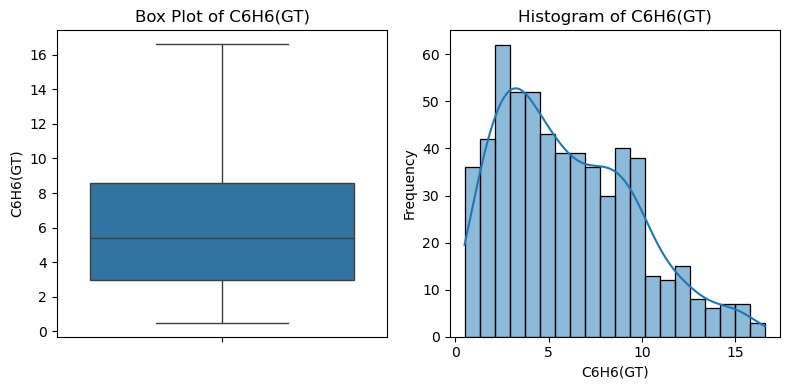

In [1053]:
# Generate plots for C6H6(GT)
generate_plots(air_quality_data, 'C6H6(GT)')

7. Column: PT08.S2(NMHC)

In [1055]:
# Generate plots for 'PT08.S2(NMHC)'
generate_plots(air_quality_data, 'PT08.S2(NMHC)')

Q1 (25th percentile): 653.25
Q3 (75th percentile): 924.0
IQR: 270.75
Lower bound for outliers: 247.125
Upper bound for outliers: 1330.125
Minimum value that is not an outlier: 448.0


8. Column: NOx(GT)

Q1 (25th percentile): 62.0
Q3 (75th percentile): 133.0
IQR: 71.0
Lower bound for outliers: -44.5
Upper bound for outliers: 239.5
Minimum value that is not an outlier: 10.0


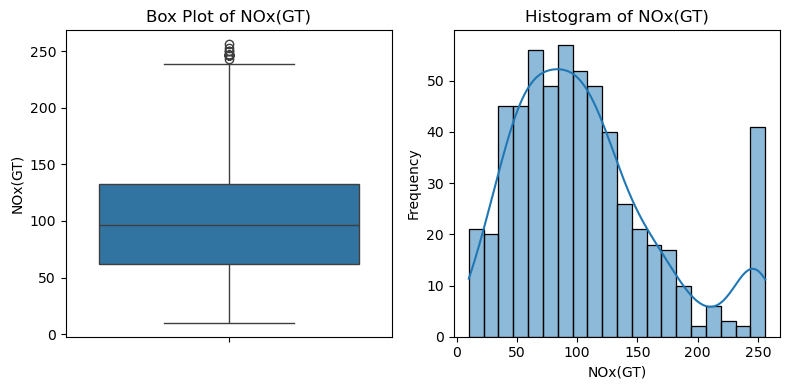

Q1 (25th percentile): 60.0
Q3 (75th percentile): 122.0
IQR: 62.0
Lower bound for outliers: -33.0
Upper bound for outliers: 215.0
Minimum value that is not an outlier: 10.0


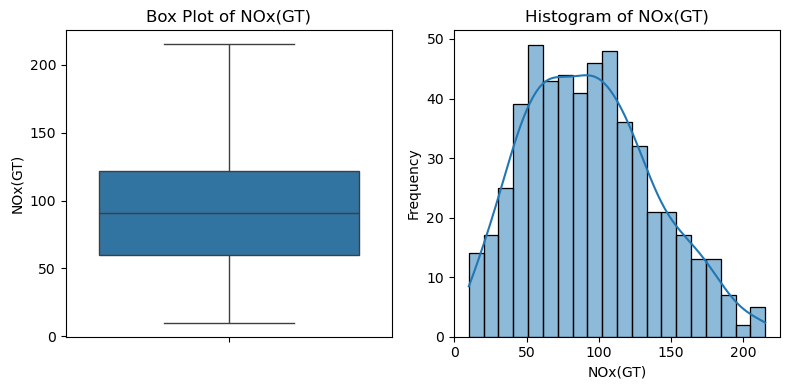

In [1057]:
# Generate plots for 'NOx(GT)' before removing outliers
generate_plots(air_quality_data, 'NOx(GT)')

# Filter the dataset to remove outliers based on the specified bounds
air_quality_data = air_quality_data[ (air_quality_data['NOx(GT)'] <= 215.0)]

generate_plots(air_quality_data, 'NOx(GT)')

9. Column: PT08.S3(NOx)

Q1 (25th percentile): 939.0
Q3 (75th percentile): 1244.0
IQR: 305.0
Lower bound for outliers: 481.5
Upper bound for outliers: 1701.5
Minimum value that is not an outlier: 646.0


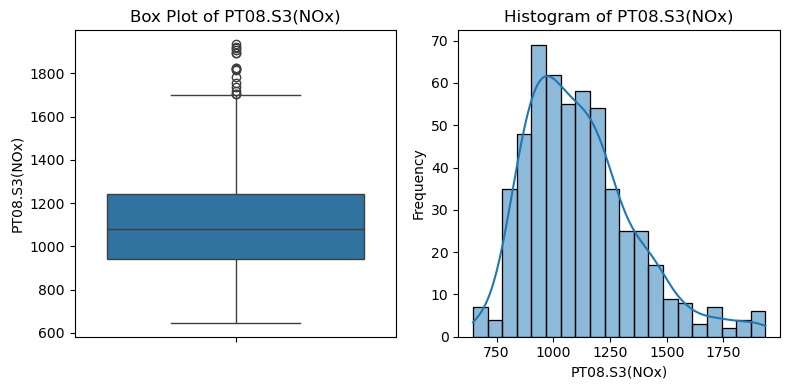

Q1 (25th percentile): 937.0
Q3 (75th percentile): 1221.5
IQR: 284.5
Lower bound for outliers: 510.25
Upper bound for outliers: 1648.25
Minimum value that is not an outlier: 689.0


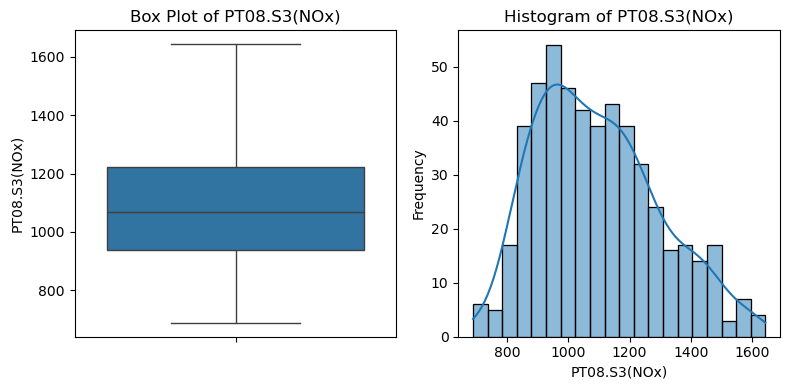

In [1059]:
# Generate plots for 'PT08.S3(NOx)' before removing outliers
generate_plots(air_quality_data, 'PT08.S3(NOx)')

# Filter the dataset to remove outliers based on the specified bounds
air_quality_data = air_quality_data[(air_quality_data['PT08.S3(NOx)'] >= 689.0) & (air_quality_data['PT08.S3(NOx)'] <= 1643)]

generate_plots(air_quality_data, 'PT08.S3(NOx)')

10. Column: NO2(GT)

Q1 (25th percentile): 69.0
Q3 (75th percentile): 98.0
IQR: 29.0
Lower bound for outliers: 25.5
Upper bound for outliers: 141.5
Minimum value that is not an outlier: 28.0


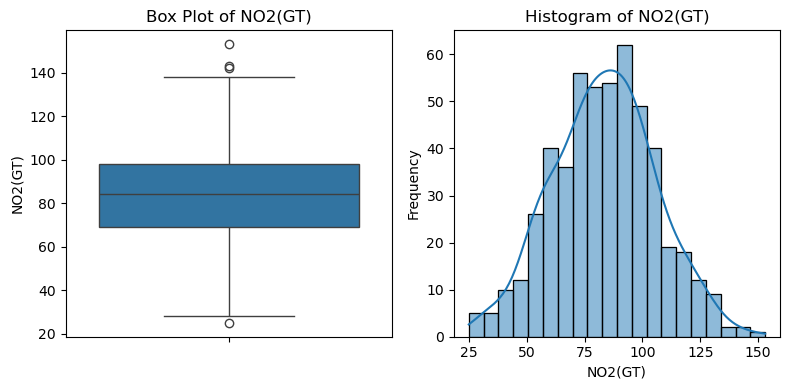

Q1 (25th percentile): 69.0
Q3 (75th percentile): 98.0
IQR: 29.0
Lower bound for outliers: 25.5
Upper bound for outliers: 141.5
Minimum value that is not an outlier: 28.0


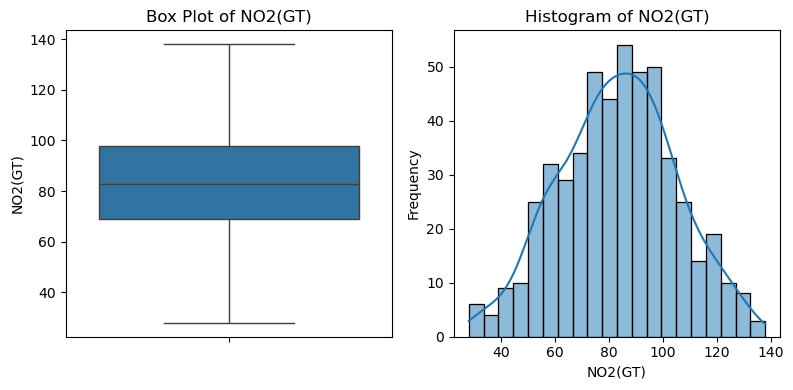

In [1061]:
# Generate plots for 'NO2(GT)' before removing outliers
generate_plots(air_quality_data, 'NO2(GT)')

# Filter the dataset to remove outliers based on the specified bounds
air_quality_data = air_quality_data[(air_quality_data['NO2(GT)'] >= 26) & (air_quality_data['NO2(GT)'] <= 138.0)]

generate_plots(air_quality_data, 'NO2(GT)')

11. Column: PT08.S4(NO2)

Q1 (25th percentile): 1307.5
Q3 (75th percentile): 1534.5
IQR: 227.0
Lower bound for outliers: 967.0
Upper bound for outliers: 1875.0
Minimum value that is not an outlier: 1036.0


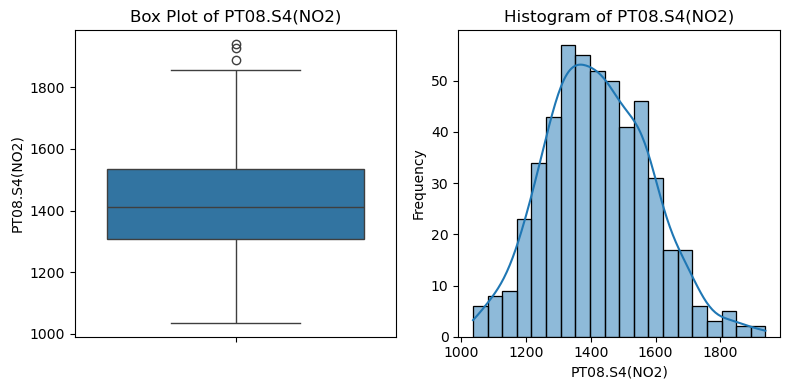

Q1 (25th percentile): 1307.0
Q3 (75th percentile): 1532.25
IQR: 225.25
Lower bound for outliers: 969.125
Upper bound for outliers: 1870.125
Minimum value that is not an outlier: 1036.0


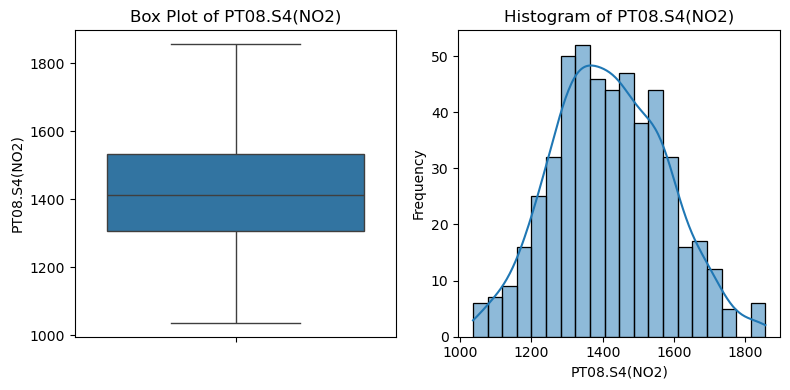

In [1063]:
# Generate plots for 'PT08.S4(NO2)' before removing outliers
generate_plots(air_quality_data, 'PT08.S4(NO2)')

# Filter the dataset to remove outliers based on specified bounds
air_quality_data = air_quality_data[(air_quality_data['PT08.S4(NO2)'] >= 1036) & (air_quality_data['PT08.S4(NO2)'] <= 1856)]

generate_plots(air_quality_data, 'PT08.S4(NO2)')

12. Column: PT08.S5(O3)

Q1 (25th percentile): 644.0
Q3 (75th percentile): 1016.75
IQR: 372.75
Lower bound for outliers: 84.875
Upper bound for outliers: 1575.875
Minimum value that is not an outlier: 332.0


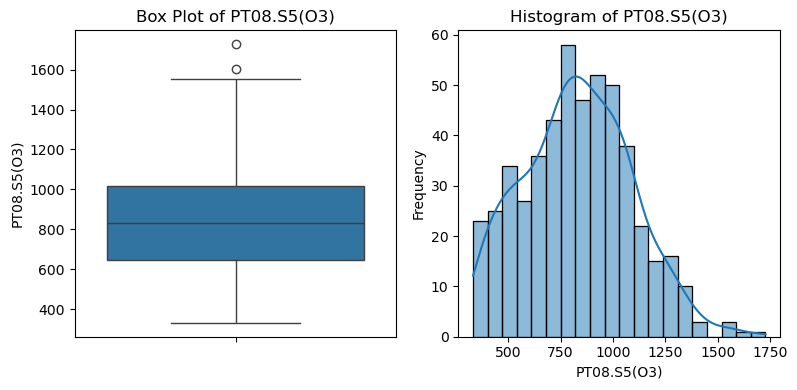

Q1 (25th percentile): 806.0
Q3 (75th percentile): 1054.0
IQR: 248.0
Lower bound for outliers: 434.0
Upper bound for outliers: 1426.0
Minimum value that is not an outlier: 684.0


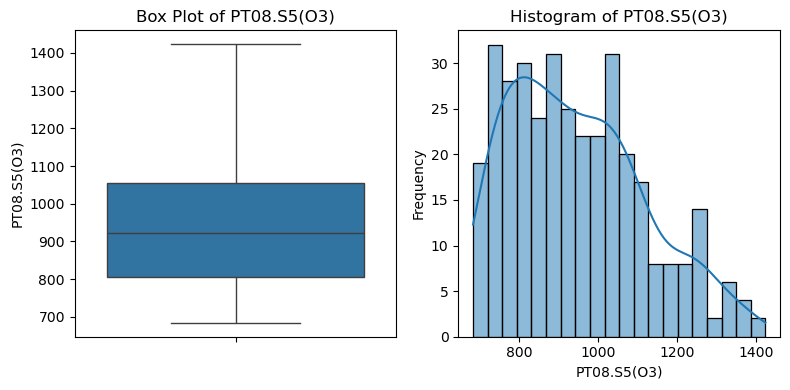

In [1065]:
# Generate plots for 'PT08.S5(O3)' before removing outliers
generate_plots(air_quality_data, 'PT08.S5(O3)')

# Filter the dataset to remove outliers based on specified bounds
air_quality_data = air_quality_data[(air_quality_data['PT08.S5(O3)'] >= 684) & (air_quality_data['PT08.S5(O3)'] <= 1423)]

generate_plots(air_quality_data, 'PT08.S5(O3)')

13. Column: T

Q1 (25th percentile): 11.0
Q3 (75th percentile): 16.9
IQR: 5.899999999999999
Lower bound for outliers: 2.150000000000002
Upper bound for outliers: 25.749999999999996
Minimum value that is not an outlier: 6.3


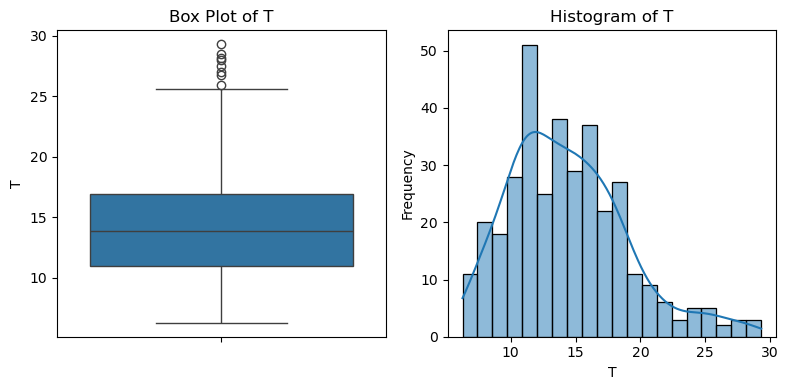

Q1 (25th percentile): 11.0
Q3 (75th percentile): 16.6
IQR: 5.600000000000001
Lower bound for outliers: 2.599999999999998
Upper bound for outliers: 25.000000000000004
Minimum value that is not an outlier: 6.3


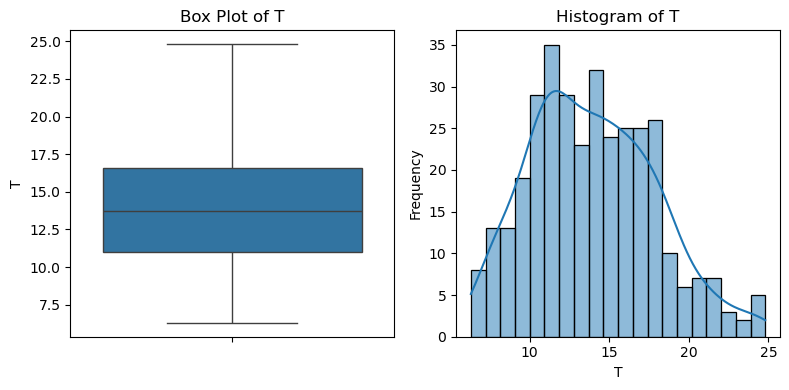

In [1067]:
# Generate plots for 'T' before removing outliers
generate_plots(air_quality_data, 'T')

# Filter the dataset to remove outliers based on specified bounds
air_quality_data = air_quality_data[(air_quality_data['T'] <= 24.8)]

generate_plots(air_quality_data, 'T')

14. Column: RH

Q1 (25th percentile): 43.5
Q3 (75th percentile): 64.0
IQR: 20.5
Lower bound for outliers: 12.75
Upper bound for outliers: 94.75
Minimum value that is not an outlier: 22.9


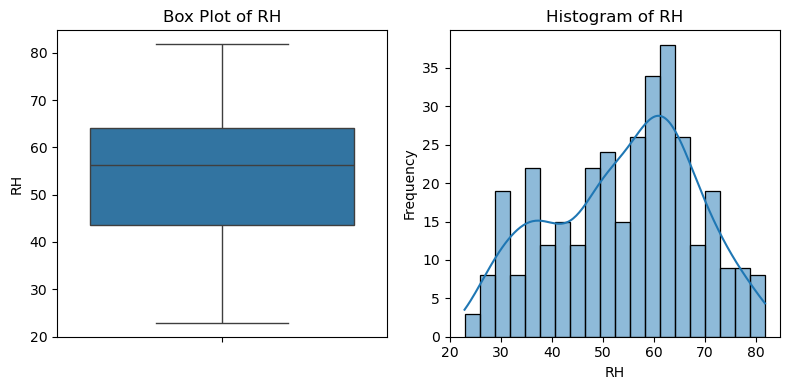

In [1069]:
# Generate plots for 'RH'
generate_plots(air_quality_data, 'RH')

15. Column: AH

In [1071]:
# Generate plots for 'AH' before removing outliers
generate_plots(air_quality_data, 'AH')

# Filter the dataset to remove outliers based on specified bounds
air_quality_data = air_quality_data[(air_quality_data['AH'] <= 1.2016)]

generate_plots(air_quality_data, 'AH')

Q1 (25th percentile): 0.7277
Q3 (75th percentile): 0.9331
IQR: 0.20540000000000003
Lower bound for outliers: 0.4196
Upper bound for outliers: 1.2412
Minimum value that is not an outlier: 0.5037


Q1 (25th percentile): 0.726425
Q3 (75th percentile): 0.922675
IQR: 0.19625000000000004
Lower bound for outliers: 0.43204999999999993
Upper bound for outliers: 1.21705
Minimum value that is not an outlier: 0.5037


-------------------------------Perform Correlation Analysis------------------------------------

In [1073]:
print("\nDescriptive Statistics:")
print(air_quality_data.describe())


Descriptive Statistics:
                                Date      CO(GT)  PT08.S1(CO)    NMHC(GT)  \
count                            332  332.000000   332.000000  332.000000   
mean   2004-03-31 02:57:49.879518080    1.671359  1104.033126  108.141566   
min              2004-03-10 00:00:00    0.500000   823.000000   17.000000   
25%              2004-03-17 00:00:00    1.200000  1020.000000   65.750000   
50%              2004-03-30 00:00:00    1.700000  1098.000000  100.000000   
75%              2004-04-10 00:00:00    2.100000  1173.750000  151.000000   
max              2004-04-29 00:00:00    3.100000  1478.000000  214.000000   
std                              NaN    0.562613   129.263905   52.195263   

         C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  PT08.S3(NOx)     NO2(GT)  \
count  332.000000     332.000000  332.000000    332.000000  332.000000   
mean     6.910233     839.345905  105.283133   1037.547962   88.668675   
min      1.300000     529.000000   31.000000    770.000000 

In [1074]:
# Using seaborn checking the correlation between the features
sns.pairplot(air_quality_data)

Lets check the correlation of all features with Multivariant

Correlation Matrix:
                   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)           1.000000     0.702448  0.651644  0.764485       0.753672   
PT08.S1(CO)      0.702448     1.000000  0.494487  0.782431       0.792730   
NMHC(GT)         0.651644     0.494487  1.000000  0.821488       0.827793   
C6H6(GT)         0.764485     0.782431  0.821488  1.000000       0.992076   
PT08.S2(NMHC)    0.753672     0.792730  0.827793  0.992076       1.000000   
NOx(GT)          0.746675     0.762217  0.668361  0.823385       0.833207   
PT08.S3(NOx)    -0.519027    -0.530716 -0.813310 -0.796526      -0.818349   
NO2(GT)          0.719529     0.763548  0.593645  0.773642       0.788994   
PT08.S4(NO2)     0.661246     0.815774  0.664803  0.846618       0.854520   
PT08.S5(O3)      0.478330     0.741535  0.350762  0.612279       0.610970   
T                0.373794     0.358496  0.576868  0.599520       0.578961   
RH              -0.335964    -0.233559 -0.483865 -0.4970

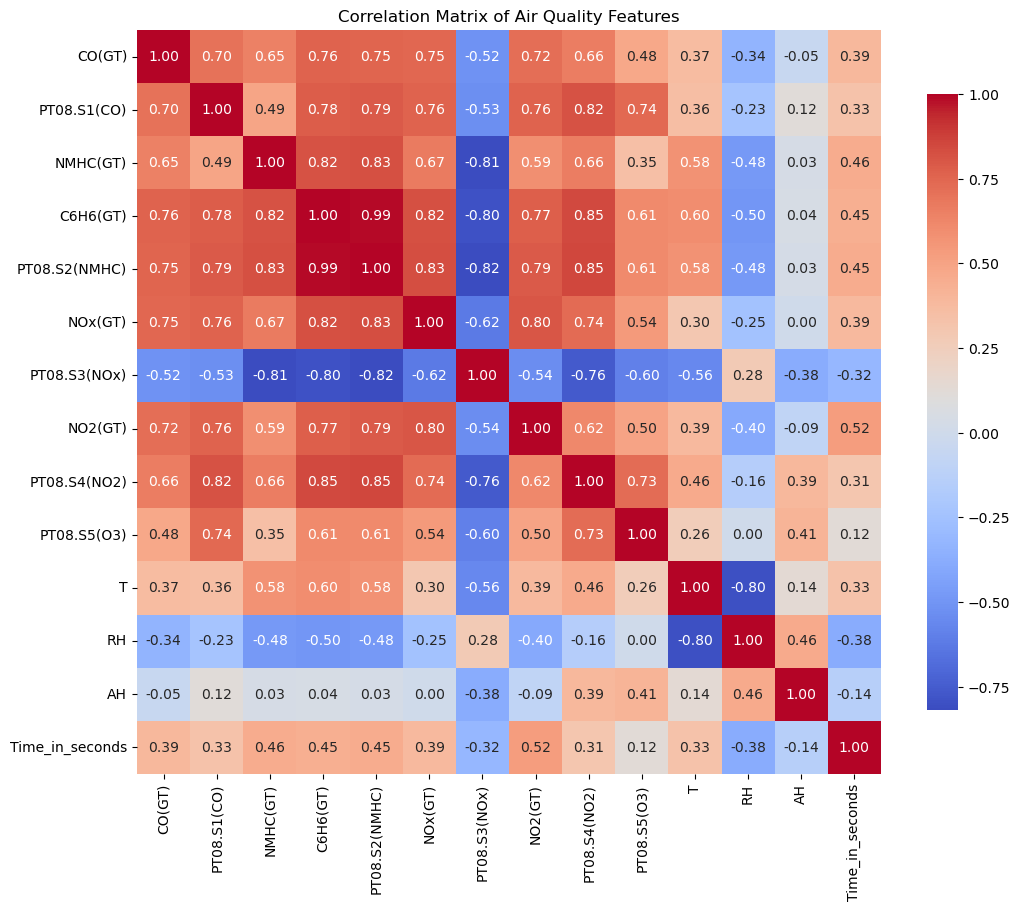

In [1076]:
# Select only numeric columns
numeric_data = air_quality_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Matrix of Air Quality Features')
plt.show()

----------------Linear Regression-----------------------------------

In [1078]:
# Step 1: Data Preparation

# Select features (X) and target variable (y)
# Example: Predicting RH based on other sensor responses and environmental factors
features = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'T', 'AH']
target = 'RH'  # Set target variable to Relative Humidity (RH)

X = air_quality_data[features]  # Features DataFrame
y = air_quality_data[target]      # Target variable

# Now X contains the features and y contains the target variable RH.

In [1079]:
# Step 2: Data Splitting

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and y_train can be used to train the model, 
# while X_test and y_test can be used for evaluating the model's performance.

In [1080]:
# Step 3: Model Training

# Create a linear regression model
modelr = LinearRegression()

# Train the model using the training data
modelr.fit(X_train, y_train)

# The model is now trained to predict RH based on the selected features.

LinearRegression()

In [1081]:
# Step 4: Model Prediction

# Predict RH using the test data
y_pred = modelr.predict(X_test)

# y_pred now contains the predicted values of RH based on the test features.

In [1082]:
# Step 5: Model Evaluation

# Calculate Mean Squared Error and R^2 Score for RH predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 3.689716667782008
R^2 Score: 0.9784059406354653


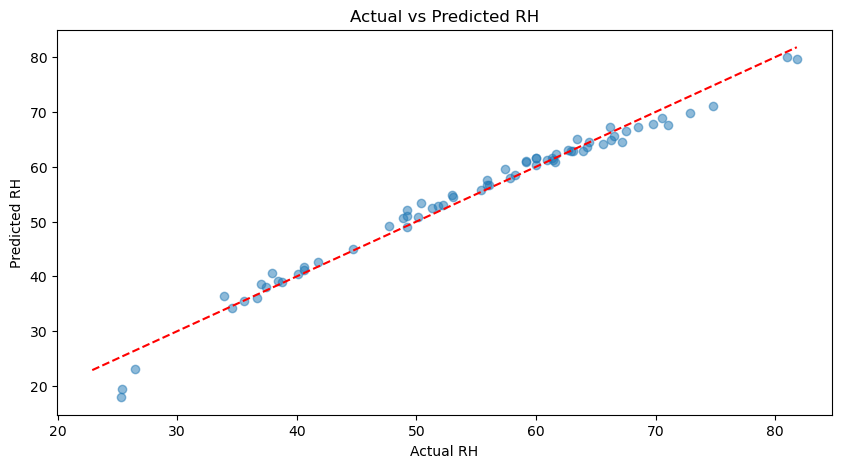

In [1083]:
# Optional: Visualize Predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Identity line
plt.xlabel('Actual RH')
plt.ylabel('Predicted RH')
plt.title('Actual vs Predicted RH')
plt.show()

In [1084]:
# Step 6: Examine the model coefficients
coefficients = pd.DataFrame(modelr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

               Coefficient
CO(GT)            0.759028
PT08.S1(CO)      -0.002882
NMHC(GT)          0.005214
C6H6(GT)         -0.901792
PT08.S2(NMHC)     0.023927
NOx(GT)           0.015865
PT08.S3(NOx)      0.009813
T                -3.040923
AH               62.548884


-------------------------------Forecasting------------------------------------
Forecasting with FB Prophet Algorithm
FB Prophet Documentation : https://facebook.github.io/prophet/docs/quick_start.html

In [1086]:
# converting the date from DD/MM/YYYY to YYYY-MM-DD
date_info = pd.to_datetime(air_quality_data['Date'])
print(date_info)

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
1183   2004-04-29
1184   2004-04-29
1186   2004-04-29
1187   2004-04-29
1188   2004-04-29
Name: Date, Length: 332, dtype: datetime64[ns]


In [1087]:
# Extract the 'Time' column from the DataFrame
time_info = air_quality_data['Time']
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
1183    01:00:00
1184    02:00:00
1186    04:00:00
1187    05:00:00
1188    06:00:00
Name: Time, Length: 332, dtype: object


In [1088]:
# Ensure time_info is a string before applying the replacement
# Replace periods in the time strings with colons
time_info = time_info.astype(str).apply(lambda x: x.replace('.', ':'))

In [1089]:
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
1183    01:00:00
1184    02:00:00
1186    04:00:00
1187    05:00:00
1188    06:00:00
Name: Time, Length: 332, dtype: object


In [1090]:
# Print the type of the 'time_info' & 'date_info' variable
print(type(date_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [1091]:
# Combining two series into a pandas DataFrame
date_time = pd.concat([date_info, time_info], axis=1)

In [1092]:
date_time.head()

Date      Time
0 2004-03-10  18:00:00
1 2004-03-10  19:00:00
2 2004-03-10  20:00:00
3 2004-03-10  21:00:00
4 2004-03-10  22:00:00

In [1093]:
date_time.shape

(332, 2)

In [1094]:
# combining date and time
date_time['ds'] = date_time['Date'].astype(str) + ' ' + date_time['Time'].astype(str)

In [1095]:
date_time.head()

Date      Time                   ds
0 2004-03-10  18:00:00  2004-03-10 18:00:00
1 2004-03-10  19:00:00  2004-03-10 19:00:00
2 2004-03-10  20:00:00  2004-03-10 20:00:00
3 2004-03-10  21:00:00  2004-03-10 21:00:00
4 2004-03-10  22:00:00  2004-03-10 22:00:00

In [1096]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 1188
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    332 non-null    datetime64[ns]
 1   Time    332 non-null    object        
 2   ds      332 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 10.4+ KB


In [1097]:
# Create an empty DataFrame named 'data'
data = pd.DataFrame()

In [1098]:
# Convert the 'ds' column in the date_time DataFrame to datetime format and assign it to the 'ds' column in the 'data' DataFrame
data['ds'] = pd.to_datetime(date_time['ds'])

In [1099]:
data.head()

ds
0 2004-03-10 18:00:00
1 2004-03-10 19:00:00
2 2004-03-10 20:00:00
3 2004-03-10 21:00:00
4 2004-03-10 22:00:00

In [1100]:
# Assigning the values from the 'RH' column of the air_quality_data DataFrame to a new column 'y' in the data DataFrame.
# In the context of FB Prophet, 'y' is the target variable that the model will predict, representing relative humidity percentage.
data['y'] = air_quality_data['RH']

In [1101]:
data.head()

ds     y
0 2004-03-10 18:00:00  48.9
1 2004-03-10 19:00:00  47.7
2 2004-03-10 20:00:00  54.0
3 2004-03-10 21:00:00  60.0
4 2004-03-10 22:00:00  59.6

In [1102]:
!pip install prophet

In [1103]:
from prophet import Prophet

In [1104]:
#training the Prophet model
model = Prophet()
model.fit(data)

03:02:14 - cmdstanpy - INFO - Chain [1] start processing
03:02:14 - cmdstanpy - INFO - Chain [1] done processing


In [1105]:
# Create a future DataFrame for predictions.
# The 'make_future_dataframe' method generates dates for future predictions.
# 'periods=365' specifies that we want to predict for the next 365 hours.
# 'freq='H'' indicates that the frequency of the predictions will be hourly.
future = model.make_future_dataframe(periods=900, freq='h')

# Display the last five rows of the future DataFrame to verify the generated dates.
future.tail()

ds
1227 2004-06-05 14:00:00
1228 2004-06-05 15:00:00
1229 2004-06-05 16:00:00
1230 2004-06-05 17:00:00
1231 2004-06-05 18:00:00

In [1106]:
# Make predictions using the trained model on the future DataFrame
forecast = model.predict(future)

# Display the last few rows of the forecast, showing the relevant columns
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1227 2004-06-05 14:00:00  20.705931    8.922769   32.974596
1228 2004-06-05 15:00:00  21.781910    9.182241   33.123846
1229 2004-06-05 16:00:00  21.048427    8.653534   33.490366
1230 2004-06-05 17:00:00  19.691495    7.477750   31.829399
1231 2004-06-05 18:00:00  19.686417    7.123190   31.410353

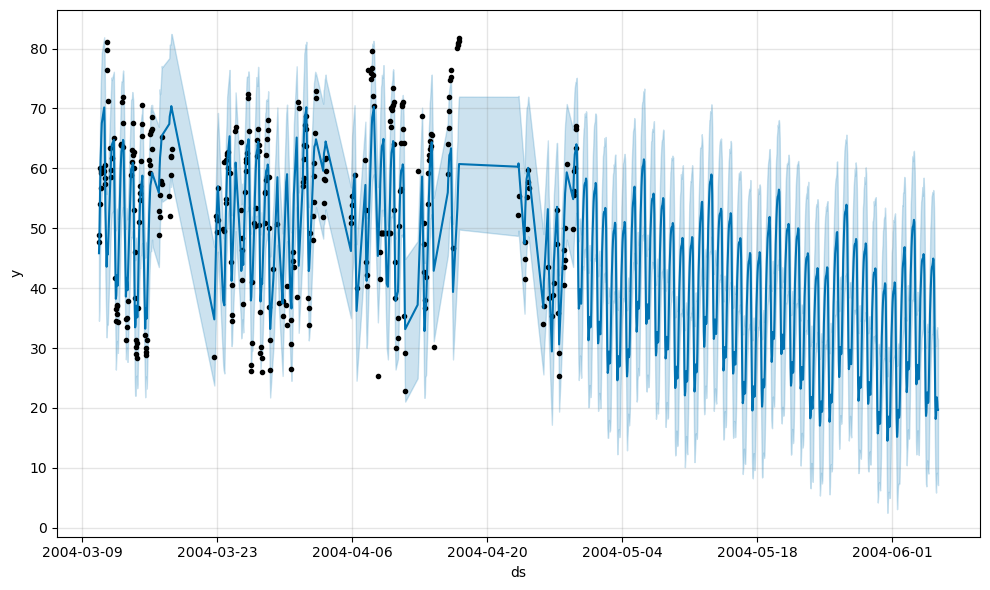

In [1107]:
# Generate a plot of the forecasted values using the trained model.
# The 'plot' method visualizes the predicted values along with the actual historical data.
# This plot will also display the confidence intervals (yhat_lower and yhat_upper) for the predictions.
fig1 = model.plot(forecast)

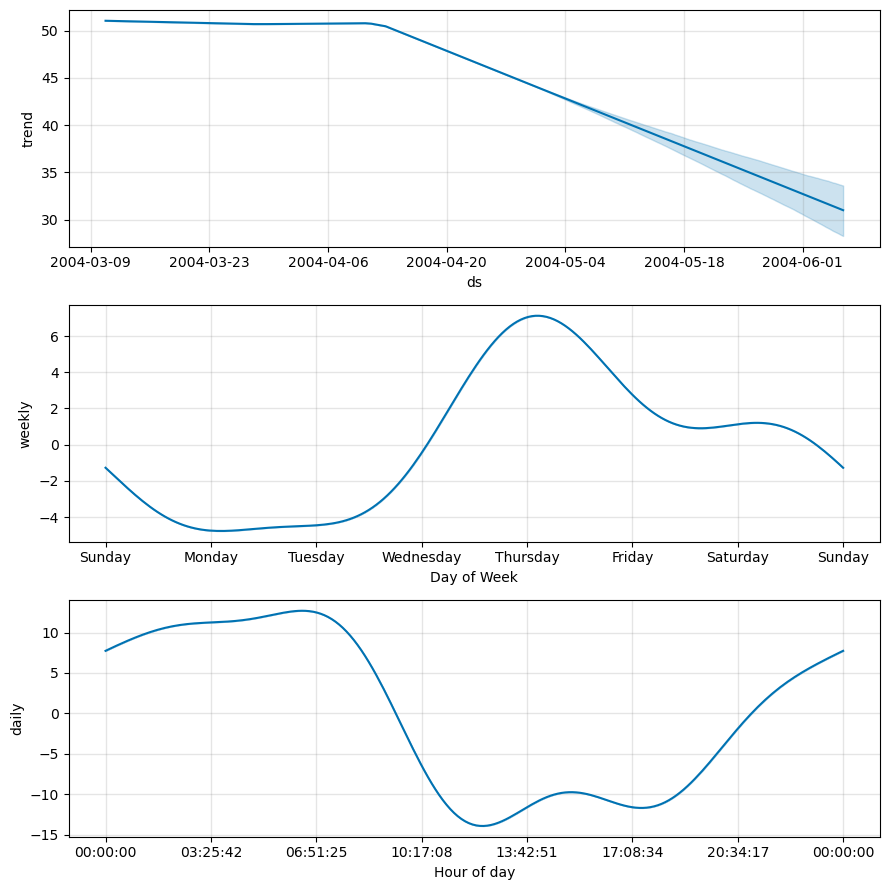

In [1108]:
# Generate a plot of the individual components of the forecast.
# The 'plot_components' method visualizes the trend and seasonal effects in the data.
# This allows for a better understanding of how each component contributes to the overall forecast.
fig2 = model.plot_components(forecast)